In [32]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.7 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 34.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

data_dict = pd.read_pickle('cleaned_data_stacked_and_dict.pkl')

In [5]:
train_df = pd.concat([data_dict['2006'], data_dict['2008'], data_dict['2010']], ignore_index=True)
id_test_df = data_dict['2012']
ood_test_df = pd.concat([data_dict['2014'], data_dict['2016']], ignore_index=True)

/var/folders/n8/5kvsh46d3s79pp231h0z4n9w0000gn/T/ipykernel_2761/137671506.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_df = pd.concat([data_dict['2006'], data_dict['2008'], data_dict['2010']], ignore_index=True)


In [6]:
print(train_df.shape)
print(id_test_df.shape)
print(ood_test_df.shape)

(55267, 186)
(19514, 186)
(37460, 186)


In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target variable, start with mortality ten years since it's more balanced than five years
X_train = train_df.drop(columns=['mortality_ten_years', 'mortality_five_years', 'year_death', 'HHID', 'PN'])  # Adjust target column
y_train = train_df['mortality_ten_years']

X_id_test = id_test_df.drop(columns=['mortality_ten_years', 'mortality_five_years', 'year_death', 'HHID', 'PN'])
y_id_test = id_test_df['mortality_ten_years']

X_ood_test = ood_test_df.drop(columns=['mortality_ten_years', 'mortality_five_years', 'year_death', 'HHID', 'PN'])
y_ood_test = ood_test_df['mortality_ten_years']


In [27]:
X_train = X_train.fillna(-999)
X_id_test = X_id_test.fillna(-999)
X_ood_test = X_ood_test.fillna(-999)

/var/folders/n8/5kvsh46d3s79pp231h0z4n9w0000gn/T/ipykernel_2761/823221145.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.fillna(-999)
/var/folders/n8/5kvsh46d3s79pp231h0z4n9w0000gn/T/ipykernel_2761/823221145.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_id_test = X_id_test.fillna(-999)
/var/folders/n8/5kvsh46d3s79pp231h0z4n9w0000gn/T/ipykernel_2761/823221145.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False)

In [28]:
# Initialize the model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
baseline_model.fit(X_train, y_train)

print("Baseline model training complete.")


Baseline model training complete.


/Users/zengsimon/miniconda3/envs/hrs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/zengsimon/miniconda3/envs/hrs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zengsimon/miniconda3/envs/hrs/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

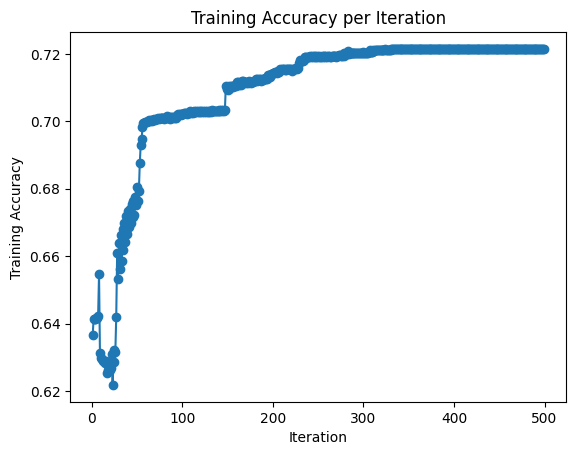

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression with warm_start
model = LogisticRegression(max_iter=1, warm_start=True, random_state=42)

training_accuracies = []

# Train for multiple iterations manually
for i in range(1, 500):  # e.g., 10 iterations
    model.set_params(max_iter=i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_train_pred)
    training_accuracies.append(acc)

# Plot training accuracy
import matplotlib.pyplot as plt
plt.plot(range(1, len(training_accuracies) + 1), training_accuracies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy per Iteration')
plt.show()


In [29]:
# Predict on ID test set
y_id_pred = baseline_model.predict(X_id_test)

# Predict on OOD test set
y_ood_pred = baseline_model.predict(X_ood_test)

# Evaluate on ID test set
print("ID Test Set Evaluation:")
print(classification_report(y_id_test, y_id_pred))

# Evaluate on OOD test set
print("OOD Test Set Evaluation:")
print(classification_report(y_ood_test, y_ood_pred))
,

ID Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     15001
           1       0.48      0.30      0.37      4513

    accuracy                           0.76     19514
   macro avg       0.64      0.60      0.61     19514
weighted avg       0.73      0.76      0.74     19514

OOD Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     34757
           1       0.23      0.17      0.20      2703

    accuracy                           0.90     37460
   macro avg       0.58      0.56      0.57     37460
weighted avg       0.89      0.90      0.89     37460



''

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False))

year_born                                                0.068046
age                                                      0.061956
health_status_current                                    0.021224
property_value_current                                   0.020482
memory_self_reported_current                             0.016470
                                                           ...   
exercise_current                                         0.000000
health_status_better_compared_to_prev_degree_previous    0.000000
health_status_better_compared_to_prev_degree_current     0.000000
health_status_worse_compared_to_prev_degree_current      0.000000
health_status_worse_compared_to_prev_degree_previous     0.000000
Length: 181, dtype: float64


In [33]:
import joblib

joblib.dump(baseline_model, 'baseline_model.pkl')

['baseline_model.pkl']

In [42]:
# Temporarily set the max rows to display all items
with pd.option_context('display.max_rows', None):
    print(importances.sort_values(ascending=False))

year_born                                                  0.068046
age                                                        0.061956
health_status_current                                      0.021224
property_value_current                                     0.020482
memory_self_reported_current                               0.016470
property_value_previous                                    0.016356
income_current                                             0.015949
property_value_earlier                                     0.015225
employment_status_current                                  0.015222
state_live_current                                         0.015215
financial_expectation_earlier                              0.014481
financial_expectation_previous                             0.012691
health_status_previous                                     0.011932
state_live_previous                                        0.011728
employment_status_previous                      

# Fairness Calculations

In [91]:
protected_attributes = ['race', 'gender', 'state_live_current', 'income_current']

def statistical_parity(y_pred, sensitive_attr):
    groups = sensitive_attr.unique()
    rates = {}
    for group in groups:
        mask = sensitive_attr == group
        rates[group] = y_pred[mask].mean()
    return max(rates.values()) - min(rates.values())

stat_parity_dict = {}

# Example: Calculate statistical parity for training, ID test, and OOD test
for attribute in protected_attributes:
    print(f"Statistical Parity Difference ({attribute}):")
    vals = []
    for dataset_name, (X, y, sensitive_attr) in {
        "Train": (X_train, y_train, X_train[attribute]),
        "ID Test": (X_id_test, y_id_test, X_id_test[attribute]),
        "OOD Test": (X_ood_test, y_ood_test, X_ood_test[attribute]),
    }.items():
        y_pred = model.predict(X)
        sp = statistical_parity(y_pred, sensitive_attr)
        print(f"Statistical Parity Difference ({dataset_name}): {sp}")
        vals.append(sp)
    stat_parity_dict[attribute] = vals



Statistical Parity Difference (race):
Statistical Parity Difference (Train): 0.3203266787658802
Statistical Parity Difference (ID Test): 0.2649191299498048
Statistical Parity Difference (OOD Test): 0.19325767690253673
Statistical Parity Difference (gender):
Statistical Parity Difference (Train): 0.010727162402795698
Statistical Parity Difference (ID Test): 0.005713121288909273
Statistical Parity Difference (OOD Test): 0.005511987691038986
Statistical Parity Difference (state_live_current):
Statistical Parity Difference (Train): 0.13950655184114003
Statistical Parity Difference (ID Test): 0.6
Statistical Parity Difference (OOD Test): 0.375
Statistical Parity Difference (income_current):
Statistical Parity Difference (Train): 1.0
Statistical Parity Difference (ID Test): 1.0
Statistical Parity Difference (OOD Test): 1.0


In [92]:
def equalized_odds(y_true, y_pred, sensitive_attr):
    # Ensure indices are aligned
    sensitive_attr = sensitive_attr.loc[y_true.index]
    
    groups = sensitive_attr.unique()
    fpr_diffs, fnr_diffs = [], []
    
    for group in groups:
        mask = sensitive_attr == group
        y_true_group = y_true[mask]
        y_pred_group = y_pred[mask]
        
        # Calculate False Positive Rate (FPR) safely
        tn_fp = sum(y_true_group == 0)
        if tn_fp > 0:
            fpr = sum((y_pred_group == 1) & (y_true_group == 0)) / tn_fp
        else:
            fpr = 0  # Set FPR to 0 if no true negatives

        # Calculate False Negative Rate (FNR) safely
        tp_fn = sum(y_true_group == 1)
        if tp_fn > 0:
            fnr = sum((y_pred_group == 0) & (y_true_group == 1)) / tp_fn
        else:
            fnr = 0  # Set FNR to 0 if no true positives

        # Track differences
        fpr_diffs.append(fpr)
        fnr_diffs.append(fnr)
    
    # Calculate the maximum difference between groups
    max_fpr_diff = max(fpr_diffs) - min(fpr_diffs)
    max_fnr_diff = max(fnr_diffs) - min(fnr_diffs)
    
    return max(max_fpr_diff, max_fnr_diff)

equalized_odds_dict = {}

for attribute in protected_attributes:
# Example: Calculate equalized odds for each dataset
    print(f"Equalized Odds Difference ({attribute}):")
    vals = []
    for dataset_name, (X, y, sensitive_attr) in {
        "Train": (X_train, y_train, X_train[attribute]),
        "ID Test": (X_id_test, y_id_test, X_id_test[attribute]),
        "OOD Test": (X_ood_test, y_ood_test, X_ood_test[attribute]),
    }.items():
        y_pred = model.predict(X)
        eo = equalized_odds(y, y_pred, sensitive_attr)
        print(f"Equalized Odds Difference ({dataset_name}): {eo}")
        vals.append(eo)
    equalized_odds_dict[attribute] = vals


Equalized Odds Difference (race):
Equalized Odds Difference (Train): 0.5476374903175832
Equalized Odds Difference (ID Test): 0.5089285714285714
Equalized Odds Difference (OOD Test): 1.0
Equalized Odds Difference (gender):
Equalized Odds Difference (Train): 0.06366791841493769
Equalized Odds Difference (ID Test): 0.03271016377262026
Equalized Odds Difference (OOD Test): 0.02704370763126518
Equalized Odds Difference (state_live_current):
Equalized Odds Difference (Train): 0.24441289372666564
Equalized Odds Difference (ID Test): 0.7132075471698113
Equalized Odds Difference (OOD Test): 0.8037974683544303
Equalized Odds Difference (income_current):
Equalized Odds Difference (Train): 1.0
Equalized Odds Difference (ID Test): 1.0
Equalized Odds Difference (OOD Test): 1.0


In [85]:
from sklearn.calibration import calibration_curve

def group_calibration(y_true, y_prob, sensitive_attr):
    groups = sensitive_attr.unique()
    calibration_results = {}
    for group in groups:
        mask = sensitive_attr == group
        y_true_group = y_true[mask]
        y_prob_group = y_prob[mask]
        prob_true, prob_pred = calibration_curve(y_true_group, y_prob_group, n_bins=10)
        calibration_results[group] = (prob_true, prob_pred)
    return calibration_results

# Function to calculate the maximum calibration gap
def calculate_max_calibration_gap(calibration_results):
    max_gap = 0
    for group, (prob_true, prob_pred) in calibration_results.items():
        # Compute absolute differences for the group
        group_gaps = [abs(t - p) for t, p in zip(prob_true, prob_pred)]
        # Update the max gap if this group has a larger one
        max_gap = max(max_gap, max(group_gaps))
    return max_gap

max_calibration_gaps_dict = {}

for attribute in protected_attributes:
    print(f"Maximum Calibration Gap ({attribute}):")
    max_gaps = []
    # Example: Calibration comparison across groups
    y_prob_train = model.predict_proba(X_train)[:, 1]
    calibration_train = group_calibration(y_train, y_prob_train, X_train[attribute])
    # Calculate the max calibration gap
    max_gap = calculate_max_calibration_gap(calibration_train)
    print("Maximum Calibration Gap (Train):", max_gap)
    max_gaps.append(max_gap)

    y_prob_id_test = model.predict_proba(X_id_test)[:, 1]
    calibration_train = group_calibration(y_id_test, y_prob_id_test, X_id_test[attribute])
    # Calculate the max calibration gap
    max_gap = calculate_max_calibration_gap(calibration_train)
    print("Maximum Calibration Gap (ID Test):", max_gap)
    max_gaps.append(max_gap)

    y_prob_ood_test = model.predict_proba(X_ood_test)[:, 1]
    calibration_train = group_calibration(y_ood_test, y_prob_ood_test, X_ood_test[attribute])
    # Calculate the max calibration gap
    max_gap = calculate_max_calibration_gap(calibration_train)
    print("Maximum Calibration Gap (OOD Test):", max_gap)
    max_gaps.append(max_gap)

    max_calibration_gaps_dict[attribute] = max_gaps

Maximum Calibration Gap (race):
Maximum Calibration Gap (Train): 0.9053410245908029
Maximum Calibration Gap (ID Test): 0.6397584019317784
Maximum Calibration Gap (OOD Test): 0.6652514608582203
Maximum Calibration Gap (gender):
Maximum Calibration Gap (Train): 0.08809060635119437
Maximum Calibration Gap (ID Test): 0.18028877717617942
Maximum Calibration Gap (OOD Test): 0.6681843906219926
Maximum Calibration Gap (state_live_current):
Maximum Calibration Gap (Train): 0.6832982269278286
Maximum Calibration Gap (ID Test): 0.7302408719156133
Maximum Calibration Gap (OOD Test): 0.9424952723443631
Maximum Calibration Gap (income_current):
Maximum Calibration Gap (Train): 0.9334317871246296
Maximum Calibration Gap (ID Test): 0.9506918306711972
Maximum Calibration Gap (OOD Test): 0.9339363179813526


In [86]:
from scipy.stats import wasserstein_distance

was_dist = {}

for attribute in protected_attributes:
    print(f"Wasserstein Distance ({attribute}):")
    dists = []
    dists.append(0)
    # Example: Wasserstein distance for a feature (e.g., income)
    distance_train_test_id = wasserstein_distance(X_train[attribute], X_id_test[attribute])
    print("Wasserstein Distance (State, Train-ID):", distance_train_test_id)
    dists.append(distance_train_test_id)

    # Example: Wasserstein distance for a feature (e.g., income)
    distance_train_test_ood = wasserstein_distance(X_train[attribute], X_ood_test[attribute])
    print("Wasserstein Distance (State, Train-OOD):", distance_train_test_ood)
    dists.append(distance_train_test_ood)

    was_dist[attribute] = dists

Wasserstein Distance (race):
Wasserstein Distance (State, Train-ID): 148.56509116025174
Wasserstein Distance (State, Train-OOD): 220.11175057943967
Wasserstein Distance (gender):
Wasserstein Distance (State, Train-ID): 0.002975580717131332
Wasserstein Distance (State, Train-OOD): 0.0007348387492602249
Wasserstein Distance (state_live_current):
Wasserstein Distance (State, Train-ID): 2.7844534356687936
Wasserstein Distance (State, Train-OOD): 2.672174734889617
Wasserstein Distance (income_current):
Wasserstein Distance (State, Train-ID): 284880.16525005136
Wasserstein Distance (State, Train-OOD): 2844696.1140351896


In [96]:
was_dist

{'race': [0, np.float64(148.56509116025174), np.float64(220.11175057943967)],
 'gender': [0,
  np.float64(0.002975580717131332),
  np.float64(0.0007348387492602249)],
 'state_live_current': [0,
  np.float64(2.7844534356687936),
  np.float64(2.672174734889617)],
 'income_current': [0,
  np.float64(284880.16525005136),
  np.float64(2844696.1140351896)]}

In [93]:
stat_parity_dict

{'race': [np.float64(0.3203266787658802),
  np.float64(0.2649191299498048),
  np.float64(0.19325767690253673)],
 'gender': [np.float64(0.010727162402795698),
  np.float64(0.005713121288909273),
  np.float64(0.005511987691038986)],
 'state_live_current': [np.float64(0.13950655184114003),
  np.float64(0.6),
  np.float64(0.375)],
 'income_current': [np.float64(1.0), np.float64(1.0), np.float64(1.0)]}

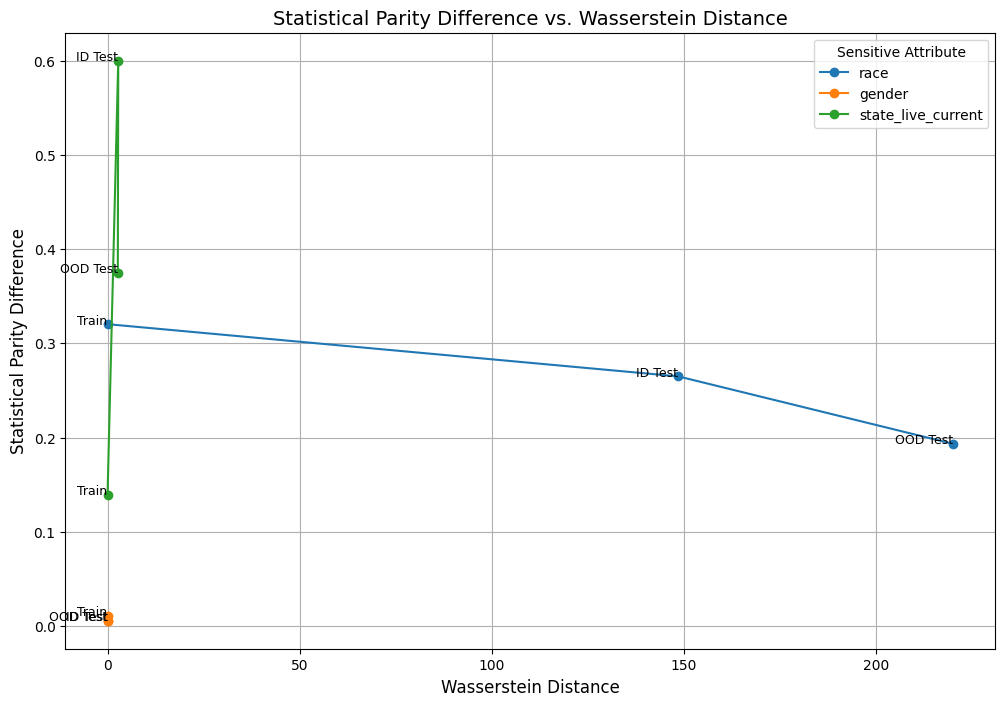

In [110]:
import matplotlib.pyplot as plt

# Example data
datasets = ['Train', 'ID Test', 'OOD Test']

plt.figure(figsize=(12, 8))
for key in was_dist.keys():

    if key == 'income_current':
        continue

    # Plot fairness metric (y-axis) vs. Wasserstein distance (x-axis)
    plt.plot(was_dist[key], stat_parity_dict[key], marker='o', label=key)
    
    # Annotate each data point with the dataset label
    for i, label in enumerate(datasets):
        plt.text(was_dist[key][i], stat_parity_dict[key][i], label, fontsize=9, ha='right')

# Customize the plot
plt.xlabel('Wasserstein Distance', fontsize=12)
plt.ylabel('Statistical Parity Difference', fontsize=12)
plt.title('Statistical Parity Difference vs. Wasserstein Distance', fontsize=14)
plt.legend(title="Sensitive Attribute")
plt.grid(True)

# Show the plot
plt.show()

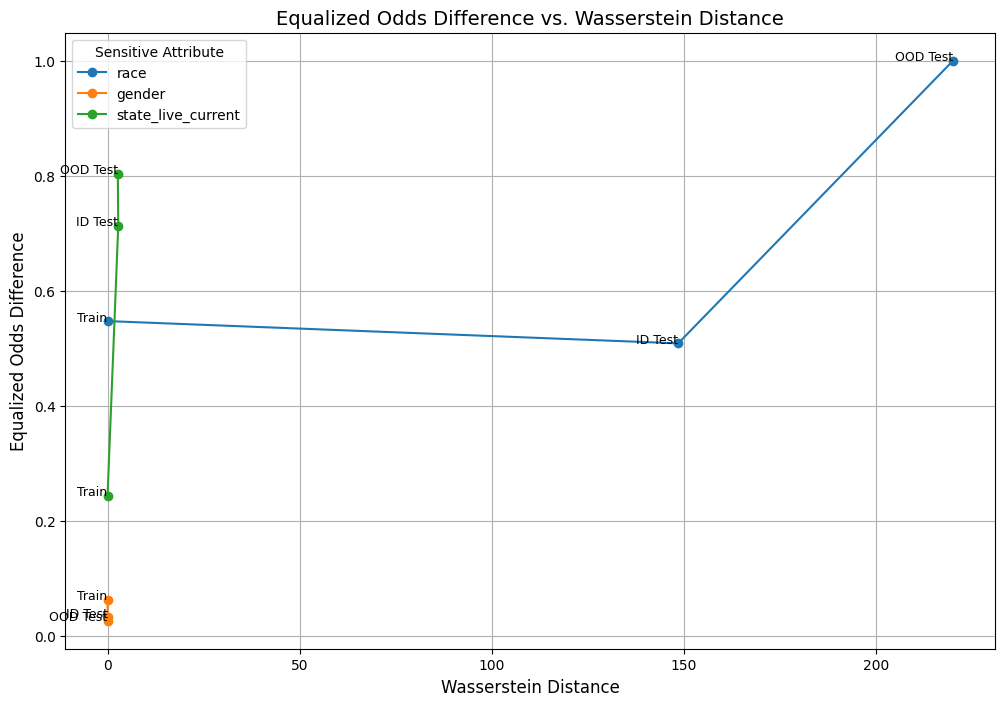

In [107]:
plt.figure(figsize=(12, 8))
for key in was_dist.keys():

    if key == 'income_current':
        continue

    # Plot fairness metric (y-axis) vs. Wasserstein distance (x-axis)
    plt.plot(was_dist[key], equalized_odds_dict[key], marker='o', label=key)
    
    # Annotate each data point with the dataset label
    for i, label in enumerate(datasets):
        plt.text(was_dist[key][i], equalized_odds_dict[key][i], label, fontsize=9, ha='right')

# Customize the plot
plt.xlabel('Wasserstein Distance', fontsize=12)
plt.ylabel('Equalized Odds Difference', fontsize=12)
plt.title('Equalized Odds Difference vs. Wasserstein Distance', fontsize=14)
plt.legend(title="Sensitive Attribute")
plt.grid(True)

# Show the plot
plt.show()

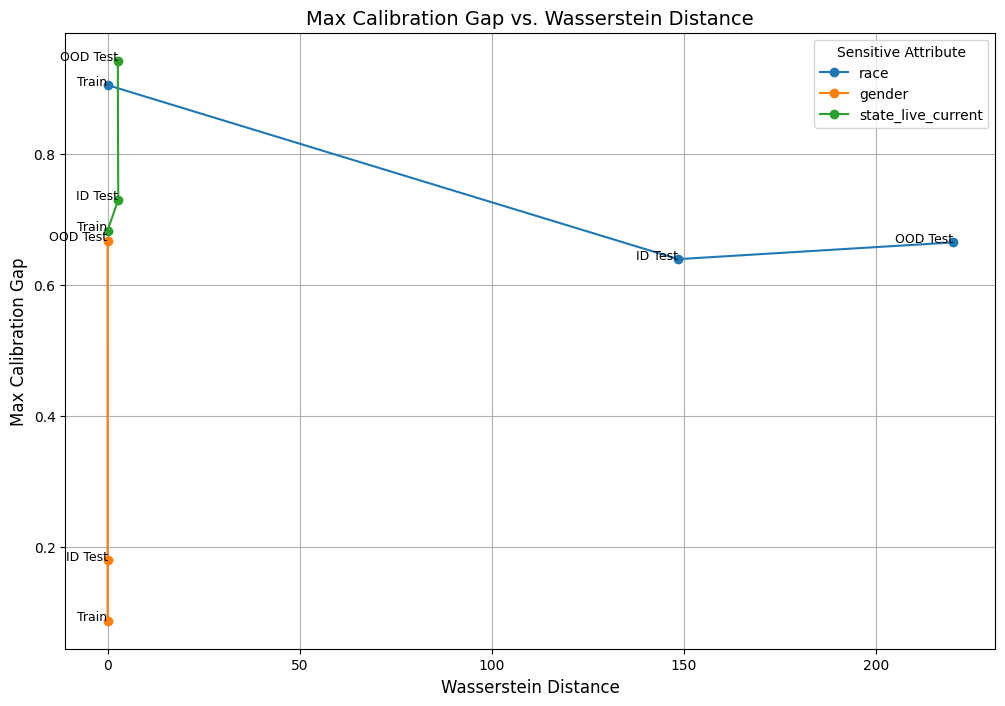

In [109]:
plt.figure(figsize=(12, 8))
for key in was_dist.keys():
    if key == 'income_current':
        continue
    # Plot fairness metric (y-axis) vs. Wasserstein distance (x-axis)
    plt.plot(was_dist[key], max_calibration_gaps_dict[key], marker='o', label=key)
    
    # Annotate each data point with the dataset label
    for i, label in enumerate(datasets):
        plt.text(was_dist[key][i], max_calibration_gaps_dict[key][i], label, fontsize=9, ha='right')

# Customize the plot
plt.xlabel('Wasserstein Distance', fontsize=12)
plt.ylabel('Max Calibration Gap', fontsize=12)
plt.title('Max Calibration Gap vs. Wasserstein Distance', fontsize=14)
plt.legend(title="Sensitive Attribute")
plt.grid(True)

# Show the plot
plt.show()

### Analysis

In a perfect world, the WD between the train and OOD test should be larger than that between the train and ID test since the OOD test is meant to represent a larger distributional shift. We see that this is only the case for some factors, such as income and race.

The fairness values should all tend to be larger/increase as the WD is larger then, indicating that the model is less fair as the distributional shift is more aggressive. 

This appears to be the case for max calibration gap because calibration depends on how well the model's predicted probabilities align with observed outcomes. Larger distribution shifts (ie higher WD) indicate that the OOD test set has feature distributions that differ significantly from those in the train set, causing for the model to become over or underconfident for certain groups, especially for those underrepresented in the training set.

This also appears to be the case for equalized odds difference because larger WDs as a result of distributional shifts can lead to imbalances in error rates (FPR and FNR) across sensitive groups. Equalized odds difference measures the difference in these error rates and larger WD often amplifies these differences as the model struggles to generalize fairly across shifted distributions.

But this doesn't appear to be the case for statistical parity difference because positive prediction rates for groups remain stable, even under large distributional shifts. Group base rates (P(y = 1 | group)) do not appear to shift proportionally with WD and 
the model may be biased or overfitted to the training data, assigning predictions uniformly across groups.

